In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
# Data from analysis
data = pd.read_csv('db_data.dat', names=['s2','dm','ji'], delim_whitespace=True)

# Data from RENO collaboration
data_cl68 = pd.read_table('../../daya_for_global_analysis/db_data/db2018_cl68.dat', names=['s2','dm'], delim_whitespace=True)
data_cl95 = pd.read_table('../../daya_for_global_analysis/db_data/db2018_cl95.dat', names=['s2','dm'], delim_whitespace=True)
data_cl99 = pd.read_table('../../daya_for_global_analysis/db_data/db2018_cl99.dat', names=['s2','dm'], delim_whitespace=True)

In [3]:
idx_min = data['ji'].idxmin()
dm_min  = data['dm'][idx_min]
s2_min  = data['s2'][idx_min]
ji_min  = data['ji'][idx_min]

In [4]:
dm_min,s2_min,ji_min

(0.002517647058823529, 0.08579349851834697, 181.61251105185607)

In [5]:
# (0.002517647058823529, 0.08579349851834697, 181.77841236969957)

# (0.002511111111111111, 0.08655699565063224, 182.6719202484306)

In [6]:
data['ji']=data['ji'] - ji_min

In [7]:
def get_interpolated_data_2D(df,size):
     
    x=df['s2'].drop_duplicates().to_numpy()
    y=df['dm'].drop_duplicates().to_numpy()
    z=df.ji.values                

    f = interpolate.interp2d(x, y, z, kind='cubic')

    x_new=np.linspace(x[0], x[-1],size)
    y_new=np.linspace(y[0], y[-1],size)
    z_for_my=f(x_new,y_new)
    z_for_my=z_for_my.T
    z_new=z_for_my.reshape(size*size)
    
    x=[]
    y=[]
    for i in x_new:
        for j in y_new:
            x.append(i)
            y.append(j)
    data_new = pd.DataFrame({'s2':x,'dm':y,'ji':z_new})
    
    idx_min        = data_new['ji'].idxmin()
    ji_min         = data_new['ji'][idx_min]
    data_new['ji'] = data_new['ji'] - ji_min
    dic={'new_min_after_interpolation':ji_min,'min_nom_arfter_interp':data_new['ji'].min()}
    print(dic)
    return data_new

In [8]:
data=get_interpolated_data_2D(data,300)

{'new_min_after_interpolation': -0.002588671192043008, 'min_nom_arfter_interp': 0.0}


In [9]:
#dat_68 = data[data['ji'] <= 2.3]#[['s2','dm']]
#dat_95 = data[data['ji'] <= 6.2]#[['s2','dm']]
#sdat_99 = data[data['ji'] <= 11.8]#[['s2','dm']]

dat_68 = data[(data['ji'] <= 2.3) & (data['ji'] >= 2.2)]#[['s2','dm']]
dat_95 = data[(data['ji'] <= 6.2) & (data['ji'] >= 6.1)]#[['s2','dm']]
dat_99 = data[(data['ji'] <= 11.8)& (data['ji'] >= 11.7)]#[['s2','dm']]

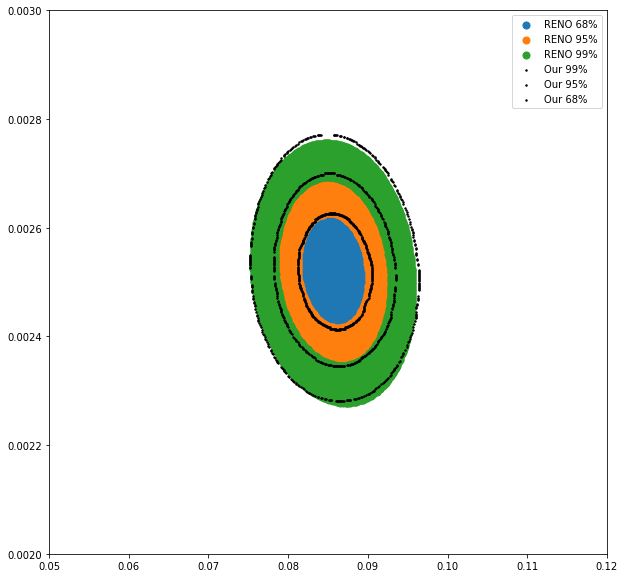

In [10]:
fig, ax = plt.subplots(figsize=(10,10))

size=50
ax.scatter(data_cl68.s2, data_cl68.dm, s=size, label='RENO 68%')
ax.scatter(data_cl95.s2, data_cl95.dm, s=size, label='RENO 95%')
ax.scatter(data_cl99.s2, data_cl99.dm, s=size, label='RENO 99%')
size=2
color='black'
ax.scatter(dat_99.s2, dat_99.dm, c=color, s=size, label='Our 99%')
ax.scatter(dat_95.s2, dat_95.dm, c=color, s=size, label='Our 95%')
ax.scatter(dat_68.s2, dat_68.dm, c=color, s=size, label='Our 68%')

ax.set_xlim(0.05, 0.12)
#ax.set_xticks([0,0.05,0.1,0.15,0.2])

ax.set_ylim(0.002, 0.003)
#ax.set_yticks([0.002,0.0025,0.0030,0.0035])

ax.legend()

#fig.savefig("reno_best_fit_param_30x30x30_f_n_reactor_flux_and_detection_energy_scale_FAR_NEAR_bkg_uncertainty_x1.1.png")
#plt.show()